In [1]:
# Load libraries
import random
from itertools import batched

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# Read data
data = np.loadtxt('data/ex1data2.txt', delimiter=',')
np.random.shuffle(data)
X = data[:, :-1]
Y = data[:, -1]
print(X.shape, Y.shape)
print(data)

(47, 2) (47,)
[[8.52000e+02 2.00000e+00 1.79900e+05]
 [2.13200e+03 4.00000e+00 3.45000e+05]
 [1.85200e+03 4.00000e+00 2.99900e+05]
 [1.49400e+03 3.00000e+00 2.42500e+05]
 [4.47800e+03 5.00000e+00 6.99900e+05]
 [2.23800e+03 3.00000e+00 3.29900e+05]
 [2.56700e+03 4.00000e+00 3.14000e+05]
 [2.30000e+03 4.00000e+00 4.49900e+05]
 [1.00000e+03 1.00000e+00 1.69900e+05]
 [2.04000e+03 4.00000e+00 3.14900e+05]
 [1.43700e+03 3.00000e+00 2.49900e+05]
 [1.81100e+03 4.00000e+00 2.85900e+05]
 [3.03100e+03 4.00000e+00 5.99000e+05]
 [1.53400e+03 3.00000e+00 3.14900e+05]
 [1.76700e+03 3.00000e+00 2.52900e+05]
 [1.38000e+03 3.00000e+00 2.12000e+05]
 [2.40000e+03 3.00000e+00 3.69000e+05]
 [1.98500e+03 4.00000e+00 2.99900e+05]
 [3.89000e+03 3.00000e+00 5.73900e+05]
 [1.60000e+03 3.00000e+00 3.29900e+05]
 [3.00000e+03 4.00000e+00 5.39900e+05]
 [1.10000e+03 3.00000e+00 2.49900e+05]
 [1.20300e+03 3.00000e+00 2.39500e+05]
 [2.60900e+03 4.00000e+00 4.99998e+05]
 [2.63700e+03 3.00000e+00 2.99900e+05]
 [1.96200e+

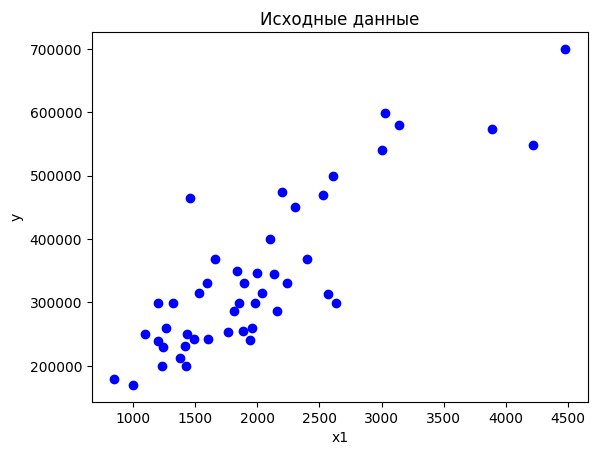

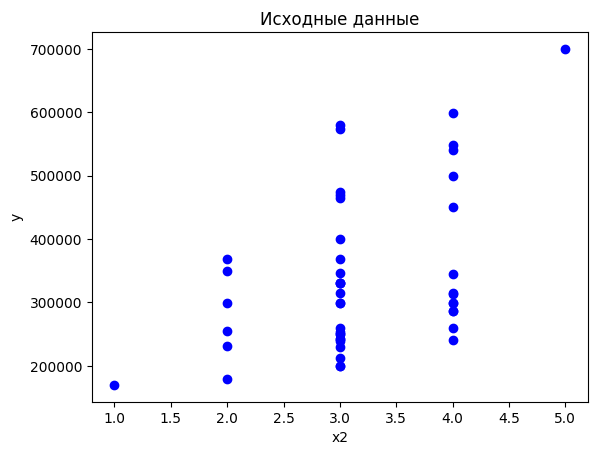

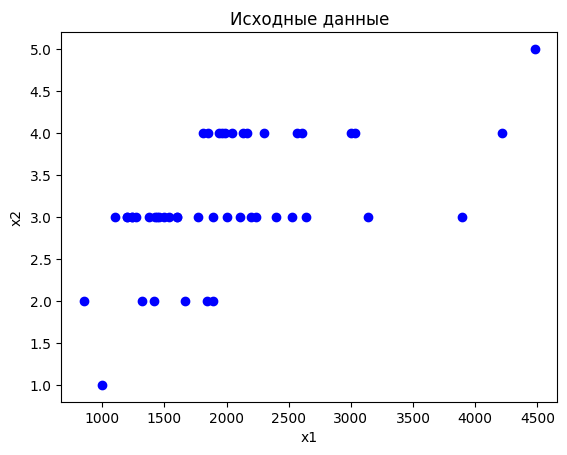

In [54]:
def visualize_data_points(x_axis, y_axis, x_axis_name: str, y_axis_name: str):
    plt.scatter(x_axis, y_axis, color='blue', label='Data points')
    plt.title('Исходные данные')
    plt.xlabel(x_axis_name)
    plt.ylabel(y_axis_name)
    plt.show()


visualize_data_points(X[:, 0], Y, "x1", "y")
visualize_data_points(X[:, 1], Y, "x2", "y")
visualize_data_points(X[:, 0], X[:, 1], "x1", "x2")


In [143]:
# Standardize data
def standardize_column(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean) / std
data_standardized = np.array([standardize_column(data[:, i]) for i in range(data.shape[1])]).T

X_standard = data_standardized[:, :-1]
Y_standard = data[:, -1]
print(data_standardized.shape)
print(data_standardized)


(47, 3)
[[-1.46104938e+00 -1.55439190e+00 -1.29756968e+00]
 [ 1.67029651e-01  1.10220517e+00  3.70836409e-02]
 [-1.89112638e-01  1.10220517e+00 -3.27500639e-01]
 [-6.44465993e-01 -2.26093368e-01 -7.91516995e-01]
 [ 3.15099326e+00  2.43050370e+00  2.90606282e+00]
 [ 3.01854946e-01 -2.26093368e-01 -8.49833796e-02]
 [ 7.20322135e-01  1.10220517e+00 -2.13517527e-01]
 [ 3.80715024e-01  1.10220517e+00  8.85085658e-01]
 [-1.27280274e+00 -2.88269044e+00 -1.37840876e+00]
 [ 5.00114703e-02  1.10220517e+00 -2.06242009e-01]
 [-7.16966387e-01 -2.26093368e-01 -7.31696071e-01]
 [-2.41262044e-01  1.10220517e+00 -4.40675360e-01]
 [ 1.31050078e+00  1.10220517e+00  2.09039644e+00]
 [-5.93588523e-01 -2.26093368e-01 -2.06242009e-01]
 [-2.97227261e-01 -2.26093368e-01 -7.07444345e-01]
 [-7.89466782e-01 -2.26093368e-01 -1.03807621e+00]
 [ 5.07908699e-01 -2.26093368e-01  2.31097448e-01]
 [-1.99450507e-02  1.10220517e+00 -3.27500639e-01]
 [ 2.40309445e+00 -2.26093368e-01  1.88749033e+00]
 [-5.09640698e-01 -2.26

In [151]:
# Split data
ones_column = np.ones((X_standard.shape[0], 1))
X_with_ones = np.hstack((ones_column, X_standard))
train_size = int(X_standard.shape[0] * 0.5)
X_train, X_validate = X_with_ones[:train_size], X_with_ones[train_size:]
y_train, y_validate = Y_standard[:train_size], Y_standard[train_size:]
print(X_train.shape, y_train.shape)
print(X_train)

(23, 3) (23,)
[[ 1.         -1.46104938 -1.5543919 ]
 [ 1.          0.16702965  1.10220517]
 [ 1.         -0.18911264  1.10220517]
 [ 1.         -0.64446599 -0.22609337]
 [ 1.          3.15099326  2.4305037 ]
 [ 1.          0.30185495 -0.22609337]
 [ 1.          0.72032214  1.10220517]
 [ 1.          0.38071502  1.10220517]
 [ 1.         -1.27280274 -2.88269044]
 [ 1.          0.05001147  1.10220517]
 [ 1.         -0.71696639 -0.22609337]
 [ 1.         -0.24126204  1.10220517]
 [ 1.          1.31050078  1.10220517]
 [ 1.         -0.59358852 -0.22609337]
 [ 1.         -0.29722726 -0.22609337]
 [ 1.         -0.78946678 -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.01994505  1.10220517]
 [ 1.          2.40309445 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          1.27107075  1.10220517]
 [ 1.         -1.14560907 -0.22609337]
 [ 1.         -1.01459959 -0.22609337]]


In [ ]:

#start_teta = np.random.randint(-10**6, 10**6, size=X_train.shape[1])
start_teta = np.array([-479532, -427773, -197486])
# Выводим результат
print(start_teta)

h = calculate_h(start_teta, X_train)
print(h.shape)
print(h)

grad = calculate_grad(h, X_train, y_train, 1)
print(grad.shape)
print(grad)



[-479532 -427773 -197486]
(23,)
[-3.65337100e+08 -9.13281512e+08 -7.93505072e+08 -6.40164852e+08
 -1.91703446e+09 -9.58427964e+08 -1.09936277e+09 -9.85147376e+08
 -4.28450018e+08 -8.73926396e+08 -6.15781791e+08 -7.75966379e+08
 -1.29784944e+09 -6.57275772e+08 -7.56946881e+08 -5.91398730e+08
 -1.02772719e+09 -8.50398881e+08 -1.66510896e+09 -6.85508790e+08
 -1.28458848e+09 -4.71622290e+08 -5.15682909e+08]
(3,)
[-8.77319844e+08 -2.12343827e+12 -3.13153286e+09]


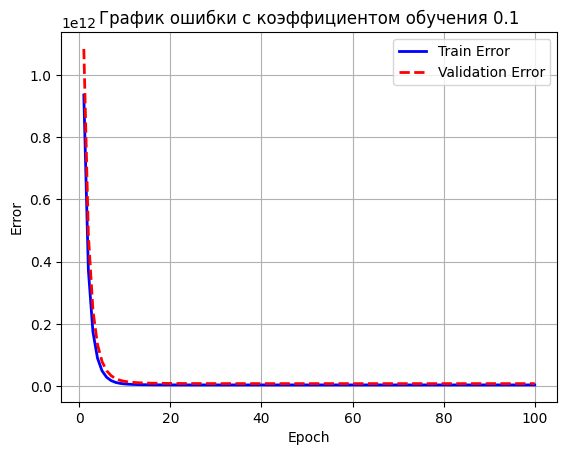

(3,)
[334003.22298052 111116.04316053   5252.62609519]


In [168]:
def draw_errors(train_error_array, validate_error_array, alpha):
    epochs = np.arange(1, len(train_error_array) + 1)

    # Линия для train_error (сплошная линия)
    plt.plot(epochs, train_error_array, label='Train Error', color='blue', linewidth=2)

    # Линия для validate_error (пунктирная линия)
    plt.plot(epochs, validate_error_array, label='Validation Error', color='red', linestyle='--', linewidth=2)

    # Настройка графика
    plt.title(f'График ошибки с коэффициентом обучения {round(alpha, 8) }')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()

    # Отображение графика
    plt.grid(True)
    plt.show()

def calculate_h(teta, x_matrix):
    return x_matrix @ teta


def calculate_grad(h_matrix, x_matrix, y_array, spead: float):
    return spead * ((h_matrix - y_array).T @ x_matrix) / x_matrix.shape[0]

def calculate_error(x_matrix, y_array, teta):
    return ((y_array - calculate_h(teta, x_matrix)) ** 2).sum() / x_matrix.shape[0]

def learn_model(x_train_matrix, y_train_array, x_validate_matrix, y_validate_array, start_teta, epoch, learn, batch_size):
    teta = start_teta.copy()
    train_error_array = []
    validate_error_array = []
    data_size = x_train_matrix.shape[0]
    for i in range(epoch):
        shuffled_indices = np.random.permutation(data_size)
        X_matrix_shuffled = x_train_matrix[shuffled_indices]
        y_array_shuffled = y_train_array[shuffled_indices]
        teta_batched_shift = np.zeros(x_train_matrix.shape[1])
        for start_batch_index in range(0, data_size, batch_size):
            x_batch = X_matrix_shuffled[start_batch_index:min(start_batch_index + batch_size, data_size)]
            y_batch = y_array_shuffled[start_batch_index:min(start_batch_index + batch_size, data_size)]
            h_array = calculate_h(teta, x_batch)
            teta_batched_shift += calculate_grad(h_array, x_batch, y_batch, learn)
        teta = teta - teta_batched_shift

        train_error = calculate_error(x_train_matrix, y_train_array, teta)
        validate_error = calculate_error(x_validate_matrix, y_validate_array, teta)
        train_error_array.append(train_error)
        validate_error_array.append(validate_error)

    return teta, train_error_array, validate_error_array


start_teta = np.random.randint(-10 ** 6, 10 ** 6, size=X_train.shape[1])

learn_cof = 0.1
teta, train_error, validate_error = learn_model(X_train, y_train, X_validate, y_validate, start_teta, 100, learn_cof, 8)
draw_errors(train_error, validate_error, learn_cof);
print(teta.shape)
print(teta)

